# Gumbel distribution
In probability theory and statistics, the Gumbel distribution (Generalized Extreme Value distribution Type-I) is used to model the distribution of the maximum (or the minimum) of a number of samples of various distributions. This distribution might be used to represent the distribution of the maximum level of a river in a particular year if there was a list of maximum values for the past ten years. It is useful in predicting the chance that an extreme earthquake, flood or other natural disaster will occur. The potential applicability of the Gumbel distribution to represent the distribution of maxima relates to extreme value theory, which indicates that it is likely to be useful if the distribution of the underlying sample data is of the normal or exponential type. The rest of this article refers to the Gumbel distribution to model the distribution of the maximum value. To model the minimum value, use the negative of the original values.

The Gumbel distribution is a particular case of the generalized extreme value distribution (also known as the Fisher-Tippett distribution). It is also known as the log-Weibull distribution and the double exponential distribution (a term that is alternatively sometimes used to refer to the Laplace distribution). It is related to the Gompertz distribution: when its density is first reflected about the origin and then restricted to the positive half line, a Gompertz function is obtained.

In the latent variable formulation of the multinomial logit model — common in discrete choice theory — the errors of the latent variables follow a Gumbel distribution. This is useful because the difference of two Gumbel-distributed random variables has a logistic distribution.

The Gumbel distribution is named after Emil Julius Gumbel (1891–1966), based on his original papers describing the distribution.[1][2]
## Formulation
The cumulative distribution function of the Gumbel distribution is:
$$F(x;\mu,\beta) = -e^{-e^{\frac{(x-\mu)}{\beta}}} $$
The mode is μ, while the median is $ \mu -\beta \ln \left(\ln 2\right)$, and the mean is given by:
$$E(x) = \mu + \gamma \beta$$
where $ \gamma \approx 0.5772$ is the Euler–Mascheroni constant.

The standard deviation $ \sigma $ is $ \beta \pi /{\sqrt {6}}$  hence $ \beta =\sigma {\sqrt {6}}/\pi \approx 0.78\sigma $ 

At the mode, where $ x=\mu $, the value of $ F(x;\mu ,\beta )$ becomes $ e^{-1}\approx 0.37$ whatever the value of $ \beta$.

In [2]:
mu1,beta1 = 0.5,2.0# mu location beta scale
mu2,beta2 = 1.0,2.0
mu3,beta3 = 1.5,3.0
mu4,beta4 = 3.0,4.0
#plot the PDF of the gumble distribution
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-5,20,100)
z = (x - mu1)/beta1
pdf1 = 1/beta1 * np.exp(-(z + np.exp(-z)))
plt.plot(x,pdf1)
z = (x - mu2)/beta2
pdf2 = 1/beta2 * np.exp(-(z + np.exp(-z)))
plt.plot(x,pdf2)
z = (x - mu3)/beta3
pdf3 = 1/beta3 * np.exp(-(z + np.exp(-z)))
plt.plot(x,pdf3)
z = (x - mu4)/beta4
pdf4 = 1/beta4 * np.exp(-(z + np.exp(-z)))
plt.plot(x,pdf4)
plt.show()

<Figure size 640x480 with 1 Axes>

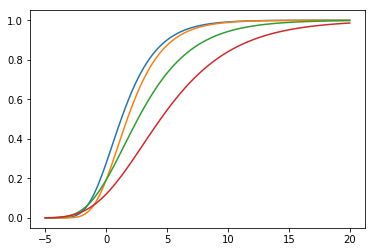

In [3]:
#plot the CDF of the gumble distribution
z = (x - mu1)/beta1
cdf1 = np.exp(-np.exp(-z))
plt.plot(x,cdf1)
z = (x - mu2)/beta2
cdf2 = np.exp(-np.exp(-z))
plt.plot(x,cdf2)
z = (x - mu3)/beta3
cdf3 = np.exp(-np.exp(-z))
plt.plot(x,cdf3)
z = (x - mu4)/beta4
cdf4 = np.exp(-np.exp(-z))
plt.plot(x,cdf4)
plt.show()

## Quantile function and generating Gumbel variates
Since the quantile function(inverse cumulative distribution function), $ Q(p)$, of a Gumbel distribution is given by

$$ Q(p)=\mu -\beta \ln(-\ln(p))$$,
the variate $ Q(U)$ has a Gumbel distribution with parameters $ \mu $  and $ \beta $ when the random variate $U$ is drawn from the uniform distribution on the interval $(0,1)$.

In [4]:
sample = np.random.uniform(0,1,1000)
q = mu1 - beta1*np.log(-np.log(sample))

## mean
Quantile distribution's mean is
$$ mean = \mu + \beta\gamma$$
here $\gamma = 0.5773$

In [5]:
gamma = 0.5773
mean_theory =  mu1 + beta1*gamma
print(mean_theory)

1.6546


In [6]:
np.mean(q)

1.7137406420019319

## std$\sigma$
Quantile distribution's $\sigma$ is
$$ \sigma = \frac{\beta*\pi}{\sqrt{6}} $$
here $\gamma = 0.5773$

In [7]:
sigma_theory = beta1* np.pi/np.sqrt(6)
print(sigma_theory)

2.565099660323728


In [8]:
np.std(q)

2.588505643442456

# Gumbel-Softmax Trick和Gumbel分布
出自https://www.cnblogs.com/initial-h/p/9468974.html

只要涉及在离散分布上运用重参数技巧时(re-parameterization)，都可以试试Gumbel-Softmax Trick。
## Gumbel-Softmax Trick用在哪里
### 问题来源
通常在强化学习中，如果动作空间是离散的，比如上、下、左、右四个动作，通常的做法是网络输出一个四维的one-hot向量(不考虑空动作)，分别代表四个动作。比如[1,0,0,0]代表上，[0,1,0,0]代表下等等。而具体取哪个动作呢，就根据输出的每个维度的大小，选择值最大的作为输出动作,即argmax(v)。

例如网络输出的四维向量为v=[−20,10,9.6,6.2]，第二个维度取到最大值10，那么输出的动作就是[0,1,0,0]，也就是下，这和多类别的分类任务是一个道理。但是这种取法有个问题是不能计算梯度，也就不能更新网络。通常的做法是加softmax函数，把向量归一化，这样既能计算梯度，同时值的大小还能表示概率的含义。softmax函数定义如下：
$$ \sigma_{z_j} = \frac{e^{z_i}}{\sum_{i = 0}^{K}e^{z_i}}$$
那么将v=[−20,10,9.6,6.2]通过softmax函数后有σ(v)=[0,0.591,0.396,0.013]，这样做不会改变动作或者说类别的选取，同时softmax倾向于让最大值的概率显著大于其他值，比如这里10和9.6经过softmax放缩之后变成了0.591和0.396，6.2对应的概率更是变成了0.013，这有利于把网络训成一个one-hot输出的形式，这种方式在分类问题中是常用方法。

  但是这么做还有一个问题，这个表示概率的向量σ(v)=[0,0.591,0.396,0.013]并没有真正显示出概率的含义，因为一旦某个值最大，就选择相应的动作或者分类。比如σ(v)=[0,0.591,0.396,0.013]和σ(v)=[0,0.9,0.1,0]在类别选取的结果看来没有任何差别，都是选择第二个类别，但是从概率意义上讲差别是巨大的。所以需要一种方法不仅选出动作，而且遵从概率的含义。

  很直接的方法是依概率采样就完事了，比如直接用np.random.choice函数依照概率生成样本值，这样概率就有意义了。这样做确实可以，但是又有一个问题冒了出来：这种方式怎么计算梯度？不能计算梯度怎么用BP的方式更新网络？

  这时重参数(re-parameterization)技巧解决了这个问题，这里有详尽的解释，不过比较晦涩。简单来说重参数技巧的一个用处是把采样的步骤移出计算图，这样整个图就可以计算梯度BP更新了。之前我一直在想分类任务直接softmax之后BP更新不就完事了吗，为什么非得采样。后来看了VAE和GAN之后明白，还有很多需要采样训练的任务。这里举简单的VAE(变分自编码器)的例子说明需要采样训练的任务以及重参数技巧，详细内容来自视频和博客。
  
### Re-parameterization Trick
最原始的自编码器通常长这样：
![image](Images/2019_3_14_1.jpg)

左右两边是端到端的出入输出网络，中间的绿色是提取的特征向量，这是一种直接从图片提取特征的方式。
  而VAE长这样:
 ![image](Images/2019_3_14_2.png)
 VAE的想法是不直接用网络去提取特征向量，而是提取这张图像的分布特征，也就把绿色的特征向量替换为分布的参数向量，比如说均值和标准差。然后需要decode图像的时候，就从encode出来的分布中采样得到特征向量样本，用这个样本去重建图像，这时怎么计算梯度的问题就出现了。
  重参数技巧可以解决这个问题，它长下面这样:
  ![image](Images/2019_3_14_3.png)
  假设图中的x和ϕ表示VAE中的均值和标准差向量，它们是确定性的节点。而需要输出的样本z是带有随机性的节点，重参数就是把带有随机性的z变成确定性的节点，同时随机性用另一个输入节点ϵ代替。例如，这里用正态分布采样，原本从均值为x和标准差为ϕ的正态分布N(x,ϕ2)中采样得到z。将其转化成从标准正态分布N(0,1)中采样得到ϵ,再计算得到z=x+ϵ⋅ϕ。这样一来，采样的过程移出了计算图，整张计算图就可以计算梯度进行更新了，而新加的ϵ的输入分支不做更新，只当成一个没有权重变化的输入。

  到这里，需要采样训练的任务实例以及重参数技巧基本有个概念了。
### Gumbel-Softmax Trick
VAE的例子是一个连续分布(正态分布)的重参数，离散分布的情况也一样，首先需要可以采样，使得离散的概率分布有意义而不是只取概率最大的值，其次需要可以计算梯度。那么怎么做到的，具体操作如下：
$$ x_{\pi} = argmax(log(\pi_i)+G_i)$$
 对于n维概率向量π,对π对应的离散随机变量xπ添加Gumbel噪声，再取样
 
 其中，Gi是独立同分布的标准Gumbel分布的随机变量，标准Gumbel分布的CDF为F(x)=e−e−x。
  这就是Gumbel-Max trick。可以看到由于这中间有一个argmax操作，这是不可导的，所以用softmax函数代替之，也就是Gumbel-Softmax Trick，而Gi可以通过Gumbel分布求逆从均匀分布生成，即Gi=−log(−log(Ui)),Ui∼U(0,1),这样就搞定了。
  
  具体实践是这样操作的,

对于网络输出的一个n维向量v,生成n个服从均匀分布U(0,1)的独立样本ϵ1,...,ϵn
通过Gi=−log(−log(ϵi))计算得到Gi
对应相加得到新的值向量v′=[v1+G1,v2+G2,...,vn+Gn]
通过softmax函数
$$ \sigma_{v'_j} = \frac{e^{v'_i/t}}{\sum_{i = 0}^{K}e^{v'_i/t}}$$
计算概率大小得到最终的类别。其中τ是温度参数。

  直观上感觉，对于强化学习来说，在选择动作之前加一个扰动，相当于增加探索度，感觉上是合理的。对于深度学习的任务来说，添加随机性去模拟分布的样本生成，也是合情合理的。
 ## Gumbel分布采样效果
 
 为什么使用Gumbel分布生成随机数，就能模拟离散概率分布的样本呢？这部分使用代码模拟来感受它的优越性。这部分例子和代码来自这里。

  首先Gumbel分布的概率密度函数长这样：
  $$F(x;\mu,\beta) = -e^{-e^{\frac{(x-\mu)}{\beta}}} $$
  Gumbel分布是一类极值分布，那么它表示什么含义呢？原链接举了一个ice cream的例子，没有get到点。这里举一个类似的喝水的例子。
  比如你每天都会喝很多次水(比如100次)，每次喝水的量也不一样。假设每次喝水的量服从正态分布N(μ,σ2)(其实也有点不合理，毕竟喝水的多少不能取为负值，不过无伤大雅能理解就好，假设均值为5)，那么每天100次喝水里总会有一个最大值，这个最大值服从的分布就是Gumbel分布。实际上，只要是指数族分布，它的极值分布都服从Gumbel分布。那么上面这个例子的分布长什么样子呢，作图有
  

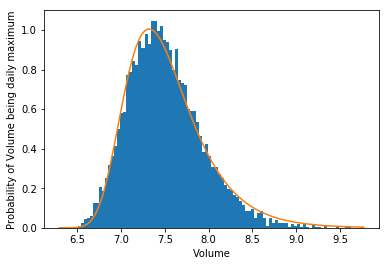

In [9]:
from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt
mean_hunger = 5
samples_per_day = 100
n_days = 10000
samples = np.random.normal(loc=mean_hunger, size=(n_days, samples_per_day))
daily_maxes = np.max(samples, axis=1)

def gumbel_pdf(prob,loc,scale):
    z = (prob-loc)/scale
    return np.exp(-z-np.exp(-z))/scale

def plot_maxes(daily_maxes):
    probs,hungers,_=plt.hist(daily_maxes,density=True,bins=100)
    plt.xlabel('Volume')
    plt.ylabel('Probability of Volume being daily maximum')
    (loc,scale),_=curve_fit(gumbel_pdf,hungers[:-1],probs)
    #curve_fit用于曲线拟合
    #接受需要拟合的函数（函数的第一个参数是输入，后面的是要拟合的函数的参数）、输入数据、输出数据
    #返回的是函数需要拟合的参数
    # https://blog.csdn.net/guduruyu/article/details/70313176
    plt.plot(hungers,gumbel_pdf(hungers,loc,scale))
    
plt.figure()
plot_maxes(daily_maxes)
plt.show()

那么gumbel分布在离散分布的采样中效果如何呢？可以作图比较一下。先定义一个多项分布，作出真实的概率密度图。再通过采样的方式比较各种方法的效果。

  如下代码定义了一个7类别的多项分布，其真实的密度函数如下图

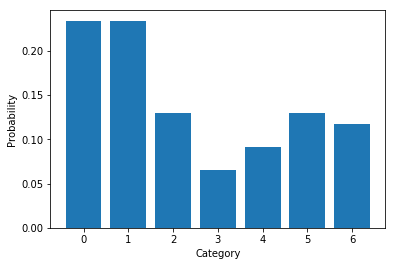

In [10]:
n_cats = 7
cats = np.arange(n_cats)
probs = np.random.randint(low=1, high=20, size=n_cats)
probs = probs / sum(probs)
logits = np.log(probs)
def plot_probs():
    plt.bar(cats, probs)
    plt.xlabel("Category")
    plt.ylabel("Probability")
plt.figure()
plot_probs()
plt.show()

Original probabilities:		0.23  0.23  0.13  0.06  0.09  0.13  0.12
Estimated probabilities:	0.24  0.23  0.13  0.07  0.09  0.13  0.12


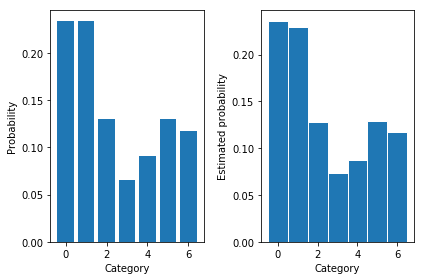

In [11]:
#首先我们直接根据真实的分布利用np.random.choice函数采样对比效果
n_samples = 1000
def plot_estimated_probs(samples,ylabel=''):
    n_cats = np.max(samples)+1
    estd_probs,_,_ = plt.hist(samples,bins=np.arange(n_cats+1),align='left',edgecolor='white',density=True)
    plt.xlabel('Category')
    plt.ylabel(ylabel+'Estimated probability')
    return estd_probs
def print_probs(probs):
    print('  '.join(['{:.2f}']*len(probs)).format(*probs))

samples = np.random.choice(cats,p=probs,size=n_samples) 

plt.figure()
plt.subplot(1,2,1)
plot_probs()
plt.subplot(1,2,2)
estd_probs = plot_estimated_probs(samples)
plt.tight_layout()#紧凑显示图片

print('Original probabilities:\t\t',end='')
print_probs(probs)
print('Estimated probabilities:\t',end='')
print_probs(estd_probs)
plt.show()

Original probabilities:  0.11 0.05 0.12 0.21 0.12 0.26 0.14

Estimated probabilities: 0.12 0.04 0.12 0.23 0.10 0.26 0.13

  效果意料之中的好。可以想到要是没有不能求梯度这个问题，直接从原分布采样是再好不过的。

  接着通过前述的方法添加Gumbel噪声采样，同时也添加正态分布和均匀分布的噪声作对比

Original probabilities:		0.23  0.23  0.13  0.06  0.09  0.13  0.12
Gumbel Estimated probabilities:	0.22  0.23  0.14  0.07  0.09  0.13  0.12
Normal Estimated probabilities:	0.31  0.27  0.11  0.04  0.07  0.13  0.08
Uniform Estimated probabilities:0.46  0.48  0.03  0.00  0.00  0.01  0.01


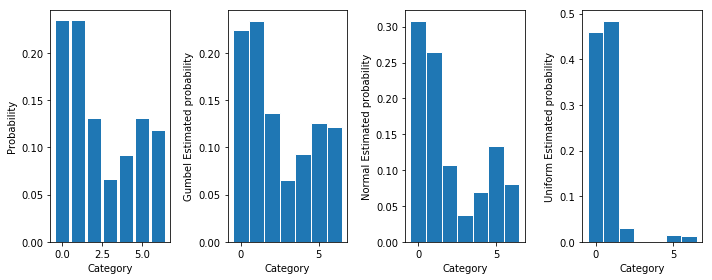

In [12]:
def sample_gumbel(logits):
    noise = np.random.gumbel(size=len(logits))
    sample = np.argmax(logits+noise)
    return sample
gumbel_samples = [sample_gumbel(logits) for _ in range(n_samples)]

def sample_uniform(logits):
    noise = np.random.uniform(size=len(logits))
    sample = np.argmax(logits+noise)
    return sample
uniform_samples = [sample_uniform(logits) for _ in range(n_samples)]

def sample_normal(logits):
    noise = np.random.normal(size=len(logits))
    sample = np.argmax(logits+noise)
    return sample
normal_samples = [sample_normal(logits) for _ in range(n_samples)]

plt.figure(figsize=(10,4))
plt.subplot(1,4,1)
plot_probs()
plt.subplot(1,4,2)
gumbel_estd_probs = plot_estimated_probs(gumbel_samples,'Gumbel ')
plt.subplot(1,4,3)
normal_estd_probs = plot_estimated_probs(normal_samples,'Normal ')
plt.subplot(1,4,4)
uniform_estd_probs = plot_estimated_probs(uniform_samples,'Uniform ')
plt.tight_layout()

print('Original probabilities:\t\t',end='')
print_probs(probs)
print('Gumbel Estimated probabilities:\t',end='')
print_probs(gumbel_estd_probs)
print('Normal Estimated probabilities:\t',end='')
print_probs(normal_estd_probs)
print('Uniform Estimated probabilities:',end='')
print_probs(uniform_estd_probs)
plt.show()

Original probabilities:      0.11 0.05 0.12 0.21 0.12 0.26 0.14

Gumbel Estimated probabilities: 0.11 0.04 0.11 0.23 0.12 0.26 0.14

Normal Estimated probabilities:  0.08 0.02 0.11 0.26 0.11 0.29 0.12

Uniform Estimated probabilities: 0.00 0.00 0.00 0.32 0.01 0.63 0.03

  可以明显看到Gumbel噪声的采样效果是最好的，正态分布其次，均匀分布最差。也就是说可以用Gumbel分布做Re-parameterization使得整个图计算可导，同时样本点最接近真实分布的样本。